<a href="https://colab.research.google.com/github/alexdiegoo/avpii-machine-learning/blob/main/AVP_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiras linhas do dataset:


,idade,renda,score,tempo_emprego,dividas,historico_pagamento,aprovado
0,56,1209,588,18,7,1,1
1,69,4071,847,6,4,1,1
2,46,10189,447,15,3,0,1
3,32,8609,766,15,7,0,1
4,60,8618,543,27,1,1,1



Distribuição das classes (0 = negado, 1 = aprovado):
aprovado
1    761
0     39
Name: count, dtype: int64

Tamanho do treino: (600, 6)
Tamanho do teste: (200, 6)

Acurácia da Árvore de Decisão: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

      Negado       1.00      1.00      1.00        10
    Aprovado       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



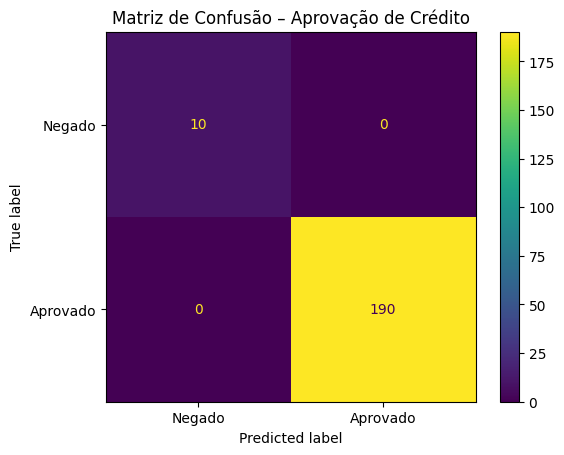

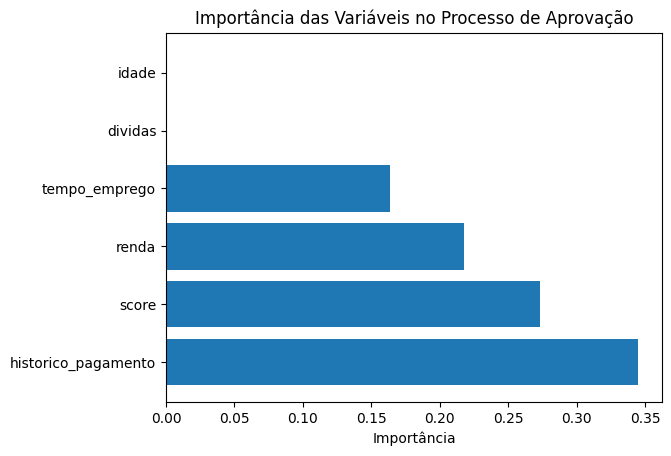

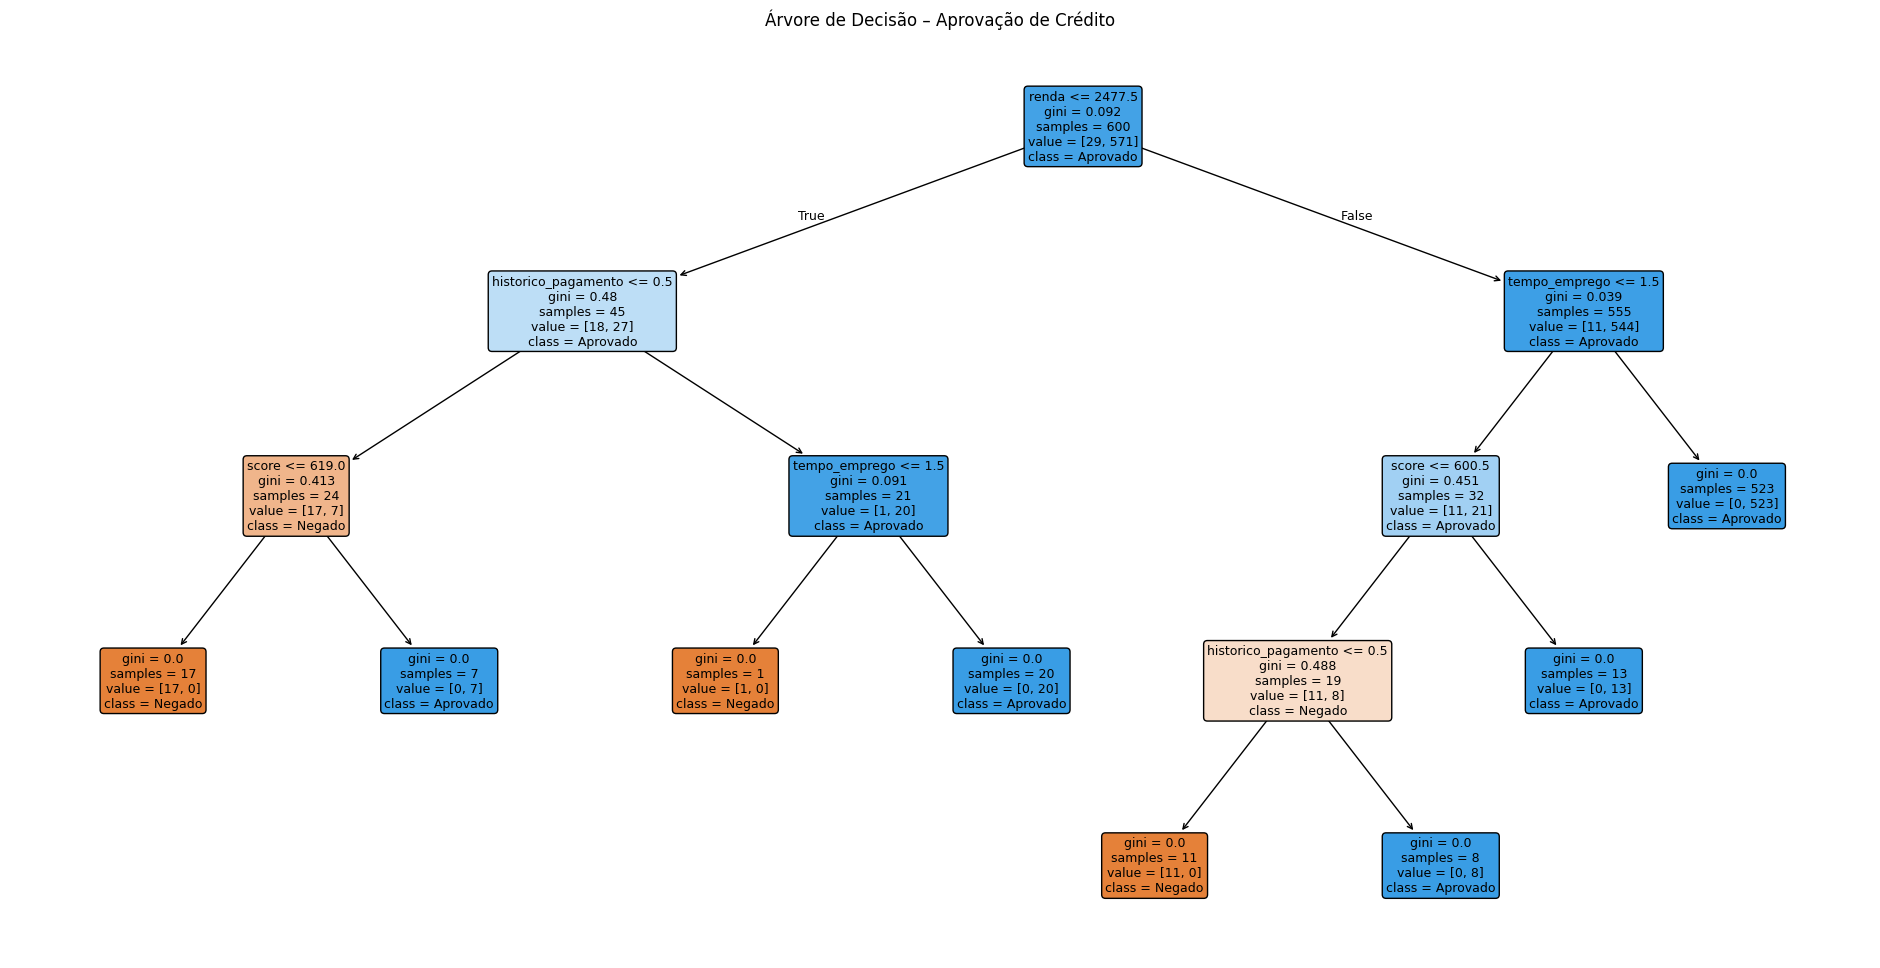


Novo cliente:


,idade,renda,score,tempo_emprego,dividas,historico_pagamento
0,35,4500,680,4,1,1


Resultado: APROVADO
Probabilidade NEGADO : 0.0
Probabilidade APROVADO: 1.0


In [6]:
# =====================================================================
# 1. IMPORTS
# =====================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

plt.rcParams["figure.figsize"] = (10, 6)
plt.style.use("default")


# =====================================================================
# 2. CENÁRIO REAL: APROVAÇÃO DE CRÉDITO
# =====================================================================
"""
Cada cliente possui informações reais do setor financeiro, como:

- idade
- renda mensal
- score de crédito (300 a 850)
- anos no emprego atual
- número de dívidas ativas
- histórico de pagamento (0 = ruim, 1 = bom)

Objetivo:
Treinar uma Árvore de Decisão para prever se o crédito deve ser:

0 = NEGADO
1 = APROVADO
"""

np.random.seed(42)

n = 800  # quantidade de clientes

# Criando um dataset realista
idade = np.random.randint(18, 70, n)
renda = np.random.randint(1200, 15000, n)
score = np.random.randint(300, 850, n)
tempo_emprego = np.random.randint(0, 30, n)
dividas = np.random.randint(0, 8, n)
historico_pagamento = np.random.randint(0, 2, n)

# Regras reais aproximadas para gerar o rótulo (target):
aprovado = (
    (renda > 2500).astype(int)
    + (score > 600).astype(int)
    + (historico_pagamento == 1).astype(int)
    + (tempo_emprego >= 2).astype(int)
)

# converte em 0 ou 1
y = (aprovado >= 2).astype(int)

# DataFrame final
df = pd.DataFrame({
    "idade": idade,
    "renda": renda,
    "score": score,
    "tempo_emprego": tempo_emprego,
    "dividas": dividas,
    "historico_pagamento": historico_pagamento,
    "aprovado": y
})

print("Primeiras linhas do dataset:")
display(df.head())

print("\nDistribuição das classes (0 = negado, 1 = aprovado):")
print(df["aprovado"].value_counts())


# =====================================================================
# 3. SEPARAÇÃO TREINO / TESTE
# =====================================================================
X = df.drop("aprovado", axis=1)
y = df["aprovado"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\nTamanho do treino:", X_train.shape)
print("Tamanho do teste:", X_test.shape)


# =====================================================================
# 4. TREINANDO A ÁRVORE DE DECISÃO
# =====================================================================
arvore = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,      # limita profundidade para evitar overfitting
    random_state=42
)

arvore.fit(X_train, y_train)


# =====================================================================
# 5. AVALIAÇÃO DO MODELO
# =====================================================================
y_pred = arvore.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("\nAcurácia da Árvore de Decisão:", round(acc, 4))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=["Negado", "Aprovado"]))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negado", "Aprovado"]).plot()
plt.title("Matriz de Confusão – Aprovação de Crédito")
plt.show()


# =====================================================================
# 6. IMPORTÂNCIA DAS VARIÁVEIS
# =====================================================================
importancias = arvore.feature_importances_
indices = np.argsort(importancias)[::-1]

plt.barh(X.columns[indices], importancias[indices])
plt.title("Importância das Variáveis no Processo de Aprovação")
plt.xlabel("Importância")
plt.show()


# =====================================================================
# 7. VISUALIZAÇÃO DA ÁRVORE DE DECISÃO
# =====================================================================
plt.figure(figsize=(24, 12))
plot_tree(
    arvore,
    feature_names=X.columns,
    class_names=["Negado", "Aprovado"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Árvore de Decisão – Aprovação de Crédito")
plt.show()


# =====================================================================
# 8. PREVISÃO PARA UM NOVO CLIENTE (CENÁRIO REAL)
# =====================================================================
"""
Simulando um cliente novo solicitando crédito no banco.
"""

novo_cliente = pd.DataFrame([{
    "idade": 35,
    "renda": 4500,
    "score": 680,
    "tempo_emprego": 4,
    "dividas": 1,
    "historico_pagamento": 1
}])

print("\nNovo cliente:")
display(novo_cliente)

pred = arvore.predict(novo_cliente)[0]
proba = arvore.predict_proba(novo_cliente)[0]

print("Resultado:", "APROVADO" if pred == 1 else "NEGADO")
print("Probabilidade NEGADO :", round(proba[0], 4))
print("Probabilidade APROVADO:", round(proba[1], 4))
